<a href="https://colab.research.google.com/github/KevinAkat/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module2/Follow_Along_DS14_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 122
## Sampling, Confidence Intervals, and Hypothesis Testing

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [0]:
import numpy as np
from scipy.stats import chisquare  # One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation

ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)
print(chisquare(ind_obs, axis=None))

dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(chisquare(dep_obs, axis=None))

[[1 2]
 [1 2]]
Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)
[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


In [0]:
# Distribution tests:
# We often assume that something is normal, but it can be important to *check*

# For example, later on with predictive modeling, a typical assumption is that
# residuals (prediction errors) are normal - checking is a good diagnostic

from scipy.stats import normaltest
# Poisson models arrival times and is related to the binomial (coinflip)
sample = np.random.poisson(5, 1000)
print(normaltest(sample))  # Pretty clearly not normal

NormaltestResult(statistic=38.69323106073592, pvalue=3.961609200867749e-09)


In [0]:
# Kruskal-Wallis H-test - compare the median rank between 2+ groups
# Can be applied to ranking decisions/outcomes/recommendations
# The underlying math comes from chi-square distribution, and is best for n>5
from scipy.stats import kruskal

x1 = [1, 3, 5, 7, 9]
y1 = [2, 4, 6, 8, 10]
print(kruskal(x1, y1))  # x1 is a little better, but not "significantly" so

x2 = [1, 1, 1]
y2 = [2, 2, 2]
z = [2, 2]  # Hey, a third group, and of different size!
print(kruskal(x2, y2, z))  # x clearly dominates

KruskalResult(statistic=0.2727272727272734, pvalue=0.6015081344405895)
KruskalResult(statistic=7.0, pvalue=0.0301973834223185)


And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## T-test Assumptions

<https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php>

- Independence of means

Are the means of our voting data independent (do not affect the outcome of one another)?
  
The best way to increase thel likelihood of our means being independent is to randomly sample (which we did not do).


In [0]:
from scipy.stats import ttest_ind

?ttest_ind

- "Homogeneity" of Variance? 

Is the magnitude of the variance between the two roughly the same?

I think we're OK on this one for the voting data, although it probably could be better, one party was larger than the other.

If we suspect this to be a problem then we can use Welch's T-test

In [0]:
?ttest_ind

- "Dependent Variable" (sample means) are Distributed Normally

<https://stats.stackexchange.com/questions/9573/t-test-for-non-normal-when-n50>

Lots of statistical tests depend on normal distributions. We can test for normality using Scipy as was shown above.

This assumption is often assumed even if the assumption is a weak one. If you strongly suspect that things are not normally distributed, you can transform your data to get it looking more normal and then run your test. This problem typically goes away for large sample sizes (yay Central Limit Theorem) and is often why you don't hear it brought up. People declare the assumption to be satisfied either way. 



## Central Limit Theorem



In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sample_means = []
for x in range(0,3000):
  coinflips = np.random.binomial(n=1, p=.5, size=12)
  one_sample = coinflips
  sample_means.append(coinflips.mean())

print(len(sample_means))
print(sample_means)

3000
[0.4166666666666667, 0.5833333333333334, 0.3333333333333333, 0.25, 0.5833333333333334, 0.5, 0.5833333333333334, 0.75, 0.3333333333333333, 0.6666666666666666, 0.5833333333333334, 0.5, 0.75, 0.3333333333333333, 0.5833333333333334, 0.5833333333333334, 0.8333333333333334, 0.6666666666666666, 0.3333333333333333, 0.25, 0.5833333333333334, 0.3333333333333333, 0.4166666666666667, 0.4166666666666667, 0.4166666666666667, 0.5833333333333334, 0.4166666666666667, 0.5833333333333334, 0.5, 0.25, 0.75, 0.5833333333333334, 0.75, 0.5, 0.3333333333333333, 0.5833333333333334, 0.6666666666666666, 0.6666666666666666, 0.5833333333333334, 0.5, 0.4166666666666667, 0.5833333333333334, 0.5833333333333334, 0.25, 0.4166666666666667, 0.5, 0.5, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.25, 0.5833333333333334, 0.4166666666666667, 0.4166666666666667, 0.5, 0.16666666666666666, 0.4166666666666667, 0.6666666666666666, 0.5833333333333334, 0.5, 0.4166666666666667, 0.5833333333333334, 0.416666666666

In [0]:
df = pd.DataFrame({'single_sample': one_sample})
df.head()

,single_sample
0,1
1,0
2,0
3,0
4,1


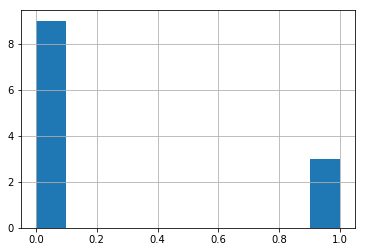

In [0]:
df.single_sample.hist();

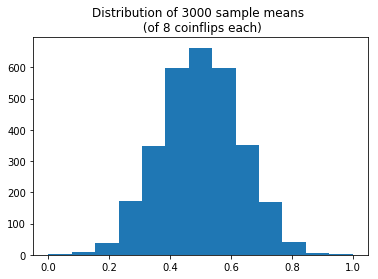

In [0]:
ax = plt.hist(sample_means, bins=13)
plt.title('Distribution of 3000 sample means \n (of 8 coinflips each)');

What does the Central Limit Theorem State? That no matter the initial distribution of the population, the distribution of sample means taken will approximate a normal distribution as $n \rightarrow \infty$.

This has very important implications for hypothesis testing and is precisely the reason why the t-distribution begins to approximate the normal distribution as our sample size increases. 

In [0]:
sample_means_small = []
sample_means_large = []
for x in range(0,3000):
  coinflips_small = np.random.binomial(n=1, p=.5, size=20)
  coinflips_large = np.random.binomial(n=1, p=.5, size=100)
  one_small_sample = coinflips_small
  one_small_large = coinflips_large
  sample_means_small.append(coinflips_small.mean())
  sample_means_large.append(coinflips_large.mean())

print(len(sample_means_small))
print(sample_means_small)

3000
[0.35, 0.55, 0.4, 0.5, 0.4, 0.4, 0.5, 0.6, 0.5, 0.45, 0.55, 0.45, 0.6, 0.45, 0.75, 0.5, 0.4, 0.35, 0.55, 0.6, 0.5, 0.75, 0.7, 0.45, 0.45, 0.75, 0.35, 0.5, 0.45, 0.5, 0.55, 0.4, 0.5, 0.45, 0.6, 0.55, 0.55, 0.5, 0.35, 0.6, 0.4, 0.5, 0.6, 0.35, 0.4, 0.5, 0.6, 0.3, 0.65, 0.45, 0.55, 0.45, 0.5, 0.4, 0.3, 0.55, 0.4, 0.3, 0.55, 0.5, 0.5, 0.5, 0.45, 0.45, 0.45, 0.6, 0.6, 0.5, 0.4, 0.65, 0.45, 0.35, 0.6, 0.65, 0.65, 0.45, 0.55, 0.5, 0.6, 0.6, 0.65, 0.6, 0.5, 0.5, 0.5, 0.35, 0.65, 0.5, 0.55, 0.55, 0.35, 0.6, 0.7, 0.65, 0.55, 0.5, 0.6, 0.5, 0.35, 0.35, 0.5, 0.5, 0.3, 0.4, 0.35, 0.4, 0.45, 0.5, 0.65, 0.45, 0.35, 0.6, 0.65, 0.6, 0.5, 0.55, 0.5, 0.65, 0.7, 0.5, 0.4, 0.5, 0.55, 0.45, 0.5, 0.4, 0.6, 0.4, 0.45, 0.4, 0.6, 0.35, 0.5, 0.55, 0.35, 0.6, 0.3, 0.3, 0.5, 0.55, 0.55, 0.55, 0.55, 0.6, 0.6, 0.4, 0.55, 0.55, 0.4, 0.55, 0.65, 0.6, 0.55, 0.55, 0.4, 0.45, 0.35, 0.5, 0.4, 0.4, 0.5, 0.45, 0.7, 0.35, 0.35, 0.35, 0.3, 0.5, 0.6, 0.45, 0.2, 0.4, 0.35, 0.4, 0.5, 0.65, 0.65, 0.55, 0.15, 0.55, 0.5, 0.4, 

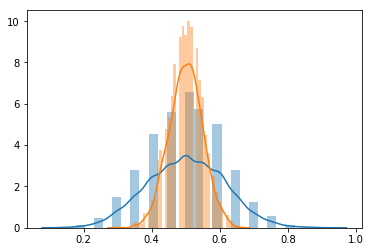

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
fix, ax = plt.subplots()
for sample in [sample_means_small, sample_means_large]:
  sns.distplot(sample)

## Standard Error of the Mean

What does it mean to "estimate" the Population mean?

## Build and Interpret a Confidence Interval

<img src="https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/Confidence_Interval.png?raw=true" width=400>

In [0]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - interval, mean + interval)

## Graphically Represent a Confidence Interval

# Chi^2 Tests

# $\chi^2$ Tests

(Pearson's $\chi^{2}$ test)

| Roll:     |  1  |  2  |  3  |  4  |  5  |  6  |
|-----------|-----|-----|-----|-----|-----|-----|
| Observed: |  27 | 13  |  10 | 15  | 30  |  32 |
| Expected: |   |   |   |   |   |   |

Null Hypothesis: The distribution of observed frequencies is equal to the distribution of expected frequencies (The die is fair)

Alternative Hypothesis: The distribution of observed frequencies is not equal to the distribution of expected frequencies - they are different. (The die is unfair)

CI = 95%, Alpha = .05

In [0]:
import numpy as np

observed_frequencies = np.array([27,13,10,15,30,32])

expected_frequency = np.array([27,13,10,15,30,32]).mean()

expected_frequencies = np.array([expected_frequency,expected_frequency,
                                 expected_frequency,expected_frequency,
                                 expected_frequency,expected_frequency])


In [10]:
from scipy import stats
stats.chisquare(observed_frequencies, expected_frequencies)

Power_divergenceResult(statistic=21.67716535433071, pvalue=0.0006029877129094496)

Since p < alpha, I reject the Null Hypothesis that the distribution of obsrved frequencies is equal to the distribution of expected frequencies at the 95%. This ain't no fair die. 

Expected Frequency = Total Observations / # Categories

### Calculate the Chi^2 Statistic (test statistic)



```
# This is formatted as code
```



In [0]:
Chi-Squared = Summation of (Observed - Expected)^2 / Expected

In [24]:
chi_squared = ((observed_frequencies - expected_frequencies)**2 / expected_frequencies).sum()

chi_squared

21.67716535433071

In [12]:
# Call 1:

(27 - 21.6666)**2 / 21.6666 

1.31285737309961

In [28]:
import pandas as pd

list1 = [1,2,3]
list2 = [4,5,6]

np1 = np.array(list1)
np2 = np.array(list2)



print(list1 + list2)
np1+np2

[1, 2, 3, 4, 5, 6]


array([5, 7, 9])

In [32]:
column1 = pd.Series([1,2,3])
column2 = pd.Series([4,5,6])

column1 + column2

0    5
1    7
2    9
dtype: int64

## Run a $\chi^{2}$ Test for Independence (between categorical variables) using Scipy

In [34]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv')

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [35]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [37]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [43]:
observed_freq = pd.crosstab(df['sex'],df['education-num'], margins=True)

observed_freq

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,All
sex,,,,,,,,,,,,,,,,,
Female,16,46,84,160,144,295,432,144,3390,2806,500,421,1619,536,92,86,10771
Male,35,122,249,486,370,638,743,289,7111,4485,882,646,3736,1187,484,327,21790
All,51,168,333,646,514,933,1175,433,10501,7291,1382,1067,5355,1723,576,413,32561


In [53]:
row_sums = observed_freq.iloc[0:2, 16:].values
row_sums = row_totals.T[0]

row_sums




array([10771, 21790])

In [55]:
col_sums = observed_freq.iloc[2,1:16].values
col_sums = col_sums[0]

column_totals

168

In [0]:
# sample size

total_total = df.shape(0)

total_total

Null: The two variables are independent

Alternative: Two variables are depenednet

In [59]:
stats.chi2_contingency(observed_freq).sum()

AttributeError: ignored

Based on 297.7 and a p-value of ~0, reject the null that these variables are independent. Suggest alternative that these 2 variables are related. 

## Run a $\chi^{2}$ Test "by hand" (Using Numpy)

###Central Limit Theorem###